In [1]:
import pandas as pd

import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import numpy as np

In [2]:
csv = "./work_dirs/cascade_mask_rcnn_swin-l_fpn_giou_ms-crop_3x_coco_exp_05-13-12:02:22/submission_best_bbox_mAP_50_epoch_25.csv"
data_dir = "../../dataset/"

In [3]:
inference = pd.read_csv(csv)

In [4]:
inf_iter = inference.iterrows()

In [5]:
LABEL_NAME = ["General trash", "Paper", "Paper pack", "Metal", 
              "Glass", "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

['General trash', 'General trash', 'Paper', 'Paper', 'Paper', 'Plastic', 'Plastic', 'Plastic', 'Styrofoam', 'Plastic bag', 'Plastic bag', 'Plastic bag', 'Plastic bag', 'Plastic bag', 'Plastic bag', 'Plastic bag', 'Plastic bag']


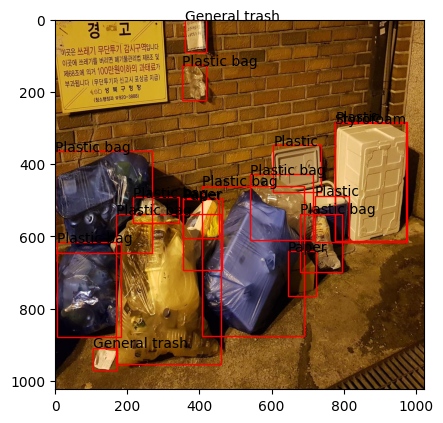

<Figure size 2000x2000 with 0 Axes>

In [14]:
_, (box_string, image_id) = next(inf_iter)
image = os.path.join(data_dir, image_id)
image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
box_string = np.reshape(box_string[:-1].split(' '), (-1, 6))
fig, ax = plt.subplots()
plt.figure(figsize=(20, 20))
ax.imshow(image)

label_list = []
for box_s in box_string:
    label, score, xmin, ymin, xmax, ymax = box_s
    label = int(label)
    score, xmin, ymin, xmax, ymax = float(score), float(xmin), float(ymin), float(xmax), float(ymax)
    if score > 0.4:
        ax.add_patch(patches.Rectangle((xmin, ymin), xmax-xmin, ymax-ymin, edgecolor='red', facecolor='none'))
        ax.text(xmin, ymin, LABEL_NAME[label])
        label_list.append(LABEL_NAME[label])
print(label_list)
